In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from multisoc.generate.two_dimensional_population import consol_comp_pop_frac_tnsr,relative_correlation_inv

import fairness_simulations
from paper_plots import *

## Load simulation data and aggregate it

In [11]:
res_df1 = pd.read_csv("paper_results/2024_10_17_16_38_n_realiz_100_sym_h_N_500_all.gz",compression='gzip')
group_cols = [col for col in res_df1 if col.startswith("prm_")] + [col for col in res_df1 if col.startswith("mdl_pop")]
results_aggregated1 = fairness_simulations.aggr_repeated_simul(
	res_df1,
	aggr_fun_lst=[np.mean, np.std],
    group_cols = group_cols
	)

res_df2 = pd.read_csv("paper_results/2023_11_28_13_31_n_realiz_100_sym_h_N_500_all.gz",compression='gzip')
group_cols = [col for col in res_df2 if col.startswith("prm_")] + [col for col in res_df2 if col.startswith("mdl_pop")]
results_aggregated2 = fairness_simulations.aggr_repeated_simul(
	res_df2,
	aggr_fun_lst=[np.mean, np.std],
    group_cols = group_cols
	)

results_aggregated = pd.concat([results_aggregated1, results_aggregated2], axis=0)

C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\fairness_simulations.py:173: FutureWarning: The provided callable <function mean at 0x0000017813AB9DA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  group_and_aggr = simul_info_df.groupby(parameter_columns).agg(res_columns_compute)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\fairness_simulations.py:173: FutureWarning: The provided callable <function std at 0x0000017813AB9EE0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  group_and_aggr = simul_info_df.groupby(parameter_columns).agg(res_columns_compute)
C:\Users\csh_samu\Documents\CSH\CSH\projects\

## Plot inequalities

C:\Users\csh_samu\AppData\Local\Temp\ipykernel_13124\2815663761.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


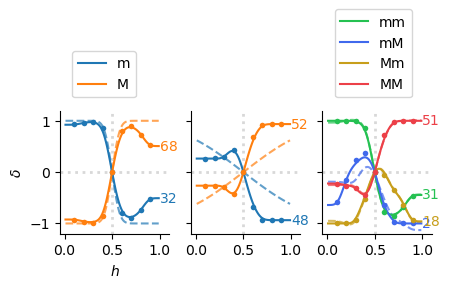

In [16]:
group_labels = [["m","M"],["m","M"]]
multidim_colors = np.array([["#25C152","#4069EC"],["#C79E1B","#EC4048"]])

## Model parameters
N = 500
f1m = 0.32
f2m = 0.48
corr_rs = 0.9
corr = relative_correlation_inv(f2m,corr_rs)

assert f1m <= f2m

## Plot analytic inequalities
fig, axs = plot_multidimensional_inequalities(N,f1m,f2m,corr,group_labels,multidim_colors)

## Include simulations if they have been loaded and are stored in the results dataframe
try:
    plot_simulations_results(results_aggregated,axs,corr,f1m,f2m,multidim_colors)
except NameError as e:
    if e.name == "results_aggregated":
        print ("WARNING! results_aggregated dataframe containing simulations is missing, showing only analytics")
    else:
        raise(e)

plt.tight_layout()
plt.savefig(f"temp/inequalities_N{N}_f1m{int(100*f1m)}_f2m{int(100*f2m)}_k{int(100*corr)}.png",dpi=600)
plt.show()